# An Introduction to Statistical Learning with Applications in R

## Statistical Learning

### What Is Statistical Learning?

In essence, statistical learning refers to a set of approaches for estimating
f.

#### Why Estimate f?

There are two main reasons that we may wish to estimate for f: prediction
and inference

#### How Do We Estimate f

Parametric methods： two-step model-based approach， First, we make an assumption about the functional form, or shape,
of f.After a model has been selected, we need a procedure that uses the
training data to fit or train the model.The most common approach is referred
to as (ordinary) least squares



![title](img/line.png)
![title](img/line2.png)
![title](img/img1.png)


Non-parametric methods: Non-parametric methods do not make explicit assumptions about the functional form of f. Instead they seek an estimate of f that gets as close to the
data points as possible without being too rough or wiggly. Such approaches can have a major advantage over parametric approaches: by avoiding the assumption of a particular functional form for f, they have the potential to accurately fit a wider range of possible shapes for f.

![title](img/img2.png)

#### The Trade-off Between Prediction Accuracy and Model Interpretability

![title](img/img3.png)

 A representation of the tradeoff between flexibility and interpretability, using different statistical learning methods. In general, as the flexibility of a method increases, its interpretability decreases.


#### Supervised versus Unsupervised Learning

Most statistical learning problems fall into one of two categories: supervised or unsupervised.

supervised :For each observation of the predictor measurement(s) xi, i = 1, . . . , n there is an associated response measurement yi.

unsupervised: describes the somewhat more challenging situation in which for every observation i = 1, . . . , n, we observe a vector of measurements xi but no associated response yi.

semi-supervised learning:. For m of the observations, where m < n, we have both predictor measurements and a response measurement. For the remaining n − m observations, we have predictor measurements but no response measurement. 

#### Regression versus Classification Problems

Variables can be characterized as either quantitative or qualitative (also known as categorical).Quantitative variables take on numerical values. Examples include a person’s age, height, or income, the value of a house, and the price of a stock. In contrast, qualitative variables take on values in one of different classes , or categories. Examples of qualitative variables include a person’s gender (male or female), the brand of product purchased (brand
A, B, or C)

### Assessing Model Accuracy

#### Measuring the Quality of Fit

 mean squared error (MSE):also known as train MSE
![title](img/line3.png)
 test MSE:
![title](img/line4.png)

![title](img/img4.png)
一个例子：左边黑色线为真实的f，橙色（线性模拟，低光滑性）蓝色和绿色（最高光滑性）分别对f进行了模拟。右边灰线是训练均方误差和光滑度的函数关系。红色是测试均方误差。

#### The Bias-Variance Trade-Of

期望测试均方误差expected test MSE：![title](img/line5.png)
![title](img/img5.png)

#### The Classification Setting

training error rate :
![title](img/line6.png)
test error rate:
![title](img/line7.png)

Bayes classifier:  Pr (Y = j I x = xo)

The Bayes error rate：, the error rate at X = x0 will be 1−maxj Pr(Y =j|X = x0).

the overall Bayes error rate is given by：![title](img/line8.png)


K-nearest neighbors (KNN) classifier.
Given a positive integer K and a test observation x0, the KNN classifier first identifies the
K points in the training data that are closest to x0, represented by N0.It then estimates the conditional probability for class j as the fraction of
points in N0 whose response values equal j:![title](img/line9.png)

k的选择对KNN有很强的影响，k增加时模型的光滑性变差，方差变低但偏差变大。

# Hands_On_Machine_Learning_with_Keras_2nd

机器学习有多种类型，可以根据如下规则进行分类：

是否在人类监督下进行训练（监督，非监督，半监督和强化学习：学习系统在这里被称为智能体（agent），可以对环境进行观察、选择和执行动作，并获得奖励作为回报（负奖励是惩罚，见图 1-12）。然后它必须自己学习哪个是最佳方法（称为策略，policy），以得到长久的最大奖励。）

是否可以动态渐进学习（在线学习 vs 批量学习）：它是否能从导入的数据流进行持续学习。

它们是否只是通过简单地比较新的数据点和已知的数据点，还是在训练数据中进行模式识别，以建立一个预测模型，就像科学家所做的那样（基于实例学习 vs 基于模型学习）

## 使用 Scikit-Learn 训练并运行线性模型

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [52]:
# 加载数据
oecd_bli = pd.read_excel("C:/Users/12077/Desktop/新建文件夹/oecd2019.xlsx")
oecd_bli
# 准备数据
X = np.c_[oecd_bli["GDP"]]
y = np.c_[oecd_bli["Life satisfaction"]]

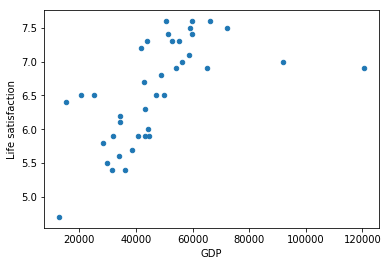

In [53]:
# 可视化数据
oecd_bli.plot(kind='scatter', x="GDP", y='Life satisfaction')
plt.show()

In [55]:
# 选择线性模型
lin_reg_model = LinearRegression()
# 训练模型
lin_reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
# 对塞浦路斯进行预测
X_new = [[22587]]  # 塞浦路斯的人均GDP
print(lin_reg_model.predict(X_new)) # outputs [[ 5.9989956]]

[[5.9989956]]


In [62]:
#使用K 近邻模型进行预测
lin_reg_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
# 训练模型
lin_reg_model.fit(X, y)
X_new = [[22587]]  # 塞浦路斯的人均GDP
print(lin_reg_model.predict(X_new))

[[6.26666667]]


## 典型的使用过程：

研究数据

选择模型

用训练数据进行训练（即，学习算法搜寻模型参数值，使代价函数最小）

最后，使用模型对新案例进行预测（这称作推断），但愿这个模型推广效果不差

## 机器学习的主要挑战
* 训练数据量不足
* 没有代表性的训练数据
* 低质量数据
* 不相关的特征
* 过拟合训练数据
* 欠拟合训练数据

## 测试和确认
* 一般使用 80% 的数据进行训练，保留20%用于测试